In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')


### Data preparation

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
string_variables= list(df.dtypes[df.dtypes==object].index)

In [7]:
for i in string_variables:
    df[i] = df[i].str.lower().str.replace(' ', '_')

In [8]:
df.totalcharges.dtype

dtype('O')

In [9]:
df.totalcharges=pd.to_numeric(df.totalcharges, errors='coerce').fillna(0)

In [10]:
df.churn=(df.churn=='yes').astype(int)

In [11]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

### Setting up validation framework

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train,df_test = train_test_split(df, test_size=0.2, random_state=1)

In [14]:
df_train, df_val=train_test_split(df_full_train, test_size=0.25, random_state=1)


In [15]:
len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [16]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [17]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [18]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

### Exporatory data analysis

In [19]:
df_full_train=df_full_train.reset_index(drop=True)

In [20]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [21]:
global_churn_rate=df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [22]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [23]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [24]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature importance analysis: Churn rate and Risk ratio

In [25]:
from IPython.display import display

In [26]:
for c in categorical: 
    print(c)
    df_group=df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### Feature importance analysis: Mutual information

In [27]:
# mutual information is used to mesure the importance of categorical features
from sklearn.metrics import mutual_info_score

In [28]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [29]:
mutual_info = df_full_train[categorical].apply(mutual_info_churn_score)
mutual_info.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Feature importance analysis: Correlation

In [30]:
# correlation is used to mesure the importance of categorical features
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [31]:
df_full_train[numerical].corrwith(df_full_train.churn).abs().to_frame()

,0
tenure,0.351885
monthlycharges,0.196805
totalcharges,0.196353


### One hot encoding

In [32]:
from sklearn.feature_extraction import DictVectorizer

In [33]:
dv = DictVectorizer(sparse=False)

In [34]:
train_dicts=df_train[categorical + numerical].to_dict(orient='records')

In [35]:
X_train=dv.fit_transform(train_dicts)

In [36]:
X_train.shape

(4225, 45)

In [37]:
val_dicts=df_val[categorical + numerical].to_dict(orient='records')

In [38]:
X_val = dv.transform(val_dicts)

### Logistic Regression Model 

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model=LogisticRegression()

In [41]:
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
model.coef_.round(3)

array([[ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
        -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
         0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
         0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
        -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
         0.213, -0.089, -0.232, -0.07 ,  0.   ]])

In [43]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [44]:
# model.predict gives hard coded results, predict_proba gives the actual probabilities
# we are concerened about the 1's (churns) so we slice for that column for prediction

In [45]:
model.predict_proba(X_val)

array([[0.99100293, 0.00899707],
       [0.79547692, 0.20452308],
       [0.78777906, 0.21222094],
       ...,
       [0.8636091 , 0.1363909 ],
       [0.20023403, 0.79976597],
       [0.16259647, 0.83740353]])

In [46]:
y_pred = model.predict_proba(X_val)[:,1]

In [47]:
churn_decision =  y_pred >=0.5

In [48]:
(churn_decision==y_val).mean()

0.8034066713981547

In [49]:
df_pred= pd.DataFrame()
df_pred['probability']=y_pred
df_pred['prediction']= churn_decision.astype(int)
df_pred['actual']=y_val
df_pred['correct']=df_pred.prediction==df_pred.actual

In [50]:
df_pred.head()

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204523,0,0,True
2,0.212221,0,0,True
3,0.543042,1,1,True
4,0.213783,0,0,True


In [51]:
df_pred.correct.mean()

0.8034066713981547

### Using model

In [52]:
dicts_train_full = df_full_train[categorical + numerical].to_dict(orient='records')

In [53]:
X_full_train = dv.fit_transform(dicts_train_full)

In [54]:
y_full_train = df_full_train.churn.values

In [55]:
model_full = LogisticRegression()
model_full.fit(X_full_train, y_full_train)

LogisticRegression()

In [56]:
y_pred = model_full.predict_proba(X_val)[:,1]

In [57]:
churn_decision = (y_pred >= 0.5)

In [58]:
(churn_decision == y_val).mean()

0.8019872249822569

### Accuracy and dummy model

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(y_val, y_pred >= 0.5)

0.8019872249822569

In [61]:
thresholds= np.linspace(0,1,21)
scores=[]

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.495
0.10 0.590
0.15 0.664
0.20 0.720
0.25 0.754
0.30 0.774
0.35 0.779
0.40 0.785
0.45 0.796
0.50 0.802
0.55 0.815
0.60 0.803
0.65 0.790
0.70 0.778
0.75 0.759
0.80 0.737
0.85 0.727
0.90 0.726
0.95 0.726
1.00 0.726


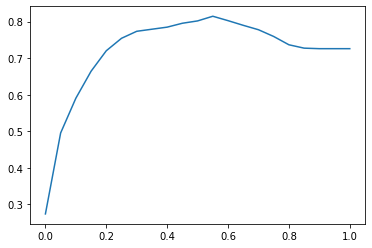

In [62]:
plt.plot(thresholds, scores)

In [63]:
#notice that the dummy model predicts with 74% accuracy and our model with 80.1%, a mere 6% difference. What does this mean?

In [64]:
from collections import Counter

In [65]:
Counter(y_val)
#There is a classification imbalance, i.e we already had more 1's than 0's so predicting for only 1's gives a pretty good figure

Counter({0: 1023, 1: 386})

In [66]:
1 - y_val.mean()

0.7260468417317246

### Confusion matrix

In [67]:
actual_positive = y_val == 1
actual_negative = y_val == 0
predict_positive = y_pred >= 0.5
predict_negative =  y_pred < 0.5

In [68]:
tp = (actual_positive &  predict_positive).sum()
tn = (actual_negative &  predict_negative).sum()
fp = (actual_negative &  predict_positive).sum()
fn = (actual_positive &  predict_negative).sum()

In [69]:
confusion_matrix = np.array([[tn, fp],
                            [fn, tp]])

In [70]:
confusion_matrix 

array([[920, 103],
       [176, 210]])

In [71]:
# so we spend money to give promotional discounts to 112 (false positive) customers we shouldn't have, and not give 167 (false negative) customers we should have,
# and will probably leave

### Precison and Recall

In [72]:
p = tp/(tp+fp)
r = tp/(tp+fn)
p,r

(0.670926517571885, 0.5440414507772021)

### True Positive Rate and True Negative Rate

In [73]:
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tpr,fpr

(0.5440414507772021, 0.10068426197458455)

In [74]:
scores=[]
thresholds = np.linspace(0,1,101)
for t in thresholds:
    actual_positive = y_val == 1
    actual_negative = y_val == 0
    predict_positive = y_pred >= t
    predict_negative =  y_pred < t
    
    tp = (actual_positive &  predict_positive).sum()
    tn = (actual_negative &  predict_negative).sum()
    fp = (actual_negative &  predict_positive).sum()
    fn = (actual_positive &  predict_negative).sum()
    
    scores.append((t,tp,fp,fn,tn))

In [75]:
cols=['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores=pd.DataFrame(scores, columns=cols)

In [76]:
df_scores['tpr'] = (df_scores.tp / (df_scores.tp + df_scores.fn)).round(2)
df_scores['fpr'] = (df_scores.fp / (df_scores.fp + df_scores.tn)).round(2)

In [77]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.00,1.00
1,0.01,386,930,0,93,1.00,0.91
2,0.02,384,855,2,168,0.99,0.84
3,0.03,383,788,3,235,0.99,0.77
4,0.04,381,741,5,282,0.99,0.72
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.00,0.00
97,0.97,0,0,386,1023,0.00,0.00
98,0.98,0,0,386,1023,0.00,0.00
99,0.99,0,0,386,1023,0.00,0.00


### ROC Curve

Text(0.5, 0, 'Threshold')

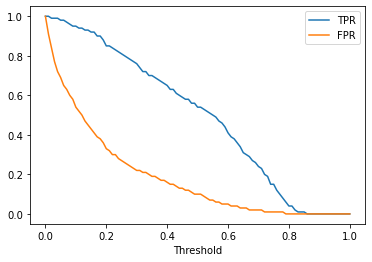

In [78]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()
plt.xlabel('Threshold')
# we want FPR to go down as fast as possible and TPR to stay up.

### Random model

In [79]:
np.random.seed(1)
y_rand = np.random.uniform(0,1, size=len(y_val))

In [80]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [81]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores=[]
    thresholds = np.linspace(0,1,101)
    for t in thresholds:
        actual_positive = y_val == 1
        actual_negative = y_val == 0
        predict_positive = y_pred >= t
        predict_negative =  y_pred < t

        tp = (actual_positive &  predict_positive).sum()
        tn = (actual_negative &  predict_negative).sum()
        fp = (actual_negative &  predict_positive).sum()
        fn = (actual_positive &  predict_negative).sum()

        scores.append((t,tp,fp,fn,tn))
        
    cols=['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores=pd.DataFrame(scores, columns=cols)
    df_scores['tpr'] = (df_scores.tp / (df_scores.tp + df_scores.fn)).round(2)
    df_scores['fpr'] = (df_scores.fp / (df_scores.fp + df_scores.tn)).round(2)
    
    return df_scores

In [82]:
df_rand= tpr_fpr_dataframe(y_val, y_rand)

Text(0.5, 0, 'Threshold')

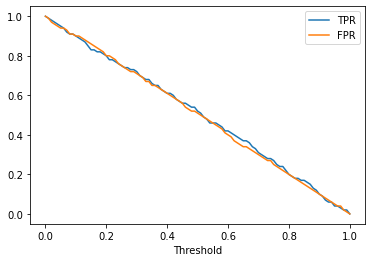

In [83]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()
plt.xlabel('Threshold')

#random model gives close to a straight-line 

### Ideal model

In [84]:
num_neg=(y_val == 0).sum()
num_pos=(y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [85]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])

In [86]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [87]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [88]:
df_ideal= tpr_fpr_dataframe(y_ideal, y_ideal_pred)

Text(0.5, 0, 'Threshold')

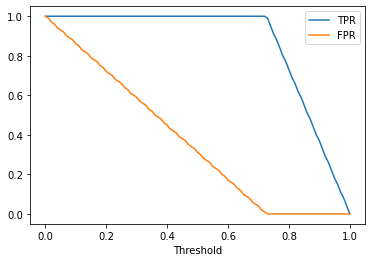

In [89]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()
plt.xlabel('Threshold')

# an ideal model classifies correctly at threshold, t = 0.726

### Plotting all together

Text(0.5, 0, 'Threshold')

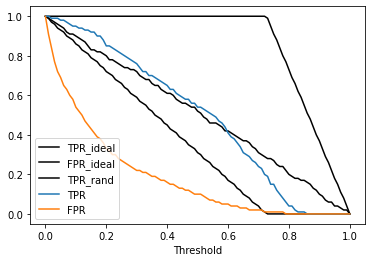

In [90]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR_ideal', color = 'black')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR_ideal', color = 'black')
plt.legend()

plt.plot(df_rand.threshold, df_rand.tpr, label='TPR_rand', color = 'black')
# plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')

plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()


plt.xlabel('Threshold')

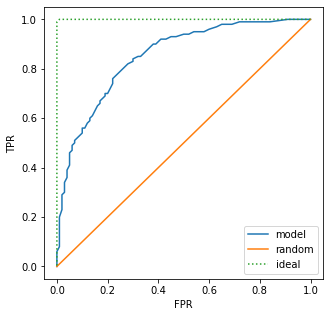

In [91]:
plt.figure(figsize=(5,5))
plt.plot(df_scores.fpr, df_scores.tpr, label = 'model')
plt.plot([0,1], [0,1], label = 'random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'ideal', linestyle = 'dotted')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# (0,1) is t=0.726, we want our curve to be as close as possible to this ideal spot,
# and as far as possible from the baseline (random)


In [92]:
# using sklearn to plot ROC curve
from sklearn.metrics import roc_curve

In [93]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

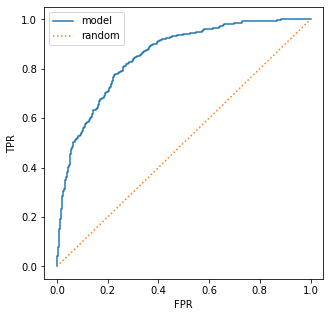

In [94]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label = 'model')
plt.plot([0,1], [0,1], label = 'random', linestyle = 'dotted')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

### Area under the ROC Curve (AUC)

In [95]:
from sklearn.metrics import auc

In [96]:
auc(fpr, tpr)

0.8510831193431895

In [97]:
auc(df_ideal.fpr, df_ideal.tpr)

0.99995

In [98]:
# or compute directly
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_pred)

0.8510831193431895

In [99]:
# i.e that the prob. of a randomly selected positive sample has a greater score
# than a randomly selected negative sample is 0.85 (AUC)

In [100]:
# quick check for 100000 trials
import random

pos = y_pred[y_val == 1]
neg = y_pred[y_val == 0]

n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1
success/n

0.85262

In [101]:
n = 100000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size = n)
neg_ind = np.random.randint(0, len(neg), size = n)
# numpy randint function is exclusive of last number, unlike random package
(pos[pos_ind] > neg[neg_ind]).mean()

0.84994

### K-Fold cross validation

In [102]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [103]:
dv, model = train(df_train, y_train, C=0.001)

In [104]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [105]:
y_pred = predict(df_val, dv, model)

In [106]:
from sklearn.model_selection import KFold

In [107]:
!pip install tqdm

In [108]:
# tqdm helps to track iterations in real time
from tqdm.auto import tqdm

In [109]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.841 +- 0.007
C=0.5 0.840 +- 0.007
C=1 0.840 +- 0.009
C=5 0.841 +- 0.007
C=10 0.841 +- 0.008


In [110]:
scores

[0.8419472333210353,
 0.8461151668653157,
 0.8325065221753962,
 0.8325226226258233,
 0.8525462018763139]

In [111]:
# C=0.1 gives the best score and variation

dv, model = train(df_full_train, df_full_train.churn.values, C=0.1)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.858533209832407